In [628]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Dodd Data Import

In [629]:
def data_cats(directory):
    os.chdir(directory)
    f_list = glob('*.csv')
    f_list = [i.rstrip('.csv') for i in f_list]
    f_list = [i.rstrip('0123456789') for i in f_list]
    f_set = set(f_list)
    output_total = len(f_list) / len(f_set)
    return f_set, int(output_total)

In [630]:
def time_finder(in_file_path):
    with open(in_file_path) as f:
        t = f.read().strip()
    m = re.findall(r"^spatial_profile.+?$", t, re.MULTILINE)
    m = m[0]
    m = m.split()
    m = m[1:]
    m.append("1E-12")
    m_float = [float(x) for x in m]
    return m_float

In [631]:
# Iterate through all the files in order, generating dataframes that need compiling.
def csv_dfer(directory, in_file_path):
    catList, max_time = data_cats(directory)
    times = time_finder(in_file_path)
    metric_final_dataframes = []
    for _ in catList:
        metric_dataframes = []
        for __,___ in zip(range(max_time), times):
            df = pd.read_csv(directory + "/" + str(_) + str(__+1) + ".csv")
            df["timestep"] = str(___)
            metric_dataframes.append(df)
        df = pd.concat(metric_dataframes)
        df["metric"] = str(_)
        metric_final_dataframes.append(df)
    final_df = pd.concat(metric_final_dataframes)
    return final_df

In [632]:
infile_path_FB = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/crunchflow_work/bfm/2022-06-14_bfm_5-0_1D_FB_100oc-100bar_Mag/basalt_5-0.in"

directory_path_FB = (infile_path_FB.replace('/basalt_5-0.in','')) + "/tec2csv"

df_FB = csv_dfer(directory_path_FB, infile_path_FB)

df_FB = df_FB.replace(to_replace=r'^\d+\.\d+-\d+$', value='0', regex=True)

# Xiong Data Import

In [633]:
fb_xiong_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/crunchflow_work/Xiong_data/FB_40weeks.csv"
fb_xiong_df = pd.read_csv(fb_xiong_path)

In [634]:
def df_interpreter(df, volume_fraction):
    x = df.Dist
    y = df[volume_fraction]
    return x, y

In [635]:
x_xiong_fb_dist_mm, y_xiong_fb_VolFrac = df_interpreter(fb_xiong_df, "Volume_Fraction")
x_xiong_fb_dist_mm_NpArr = np.array(x_xiong_fb_dist_mm)
y_xiong_fb_VolFrac_NpArr = np.array(y_xiong_fb_VolFrac)

In [636]:
def NormalizeData(data, lower, upper):
    return (data - lower) / (upper - lower)

In [637]:
lower = 0
upper = max(y_xiong_fb_VolFrac_NpArr)
y_xiong_fb_VolFrac_norm = NormalizeData(y_xiong_fb_VolFrac_NpArr, lower, upper)

# Dodd Mineralogical Data Carpentry

In [638]:
df = df_FB.filter(["X", "timestep", "metric", "Calcite", "Siderite", "Magnesite", "Diopside", "Hedenbergite", "Albite", "Anorthite", "M_Microcline", "Forsterite", "Fayalite", "Antigorite", "Greenalite", "Magnetite"])
df = df.dropna(axis=0)
df = df[df["metric"] == "volume"]
df['Carbonates'] = df['Calcite'].astype(float) + df['Siderite'].astype(float) + df['Magnesite'].astype(float)
df

,X,timestep,metric,Calcite,Siderite,Magnesite,Diopside,Hedenbergite,Albite,Anorthite,M_Microcline,Forsterite,Fayalite,Antigorite,Greenalite,Magnetite,Carbonates
0,2.0,0.0001,volume,9.999999e-11,1.000000e-10,1.000000e-10,0.042,0.024,0.039,0.057,0.099,0.024,0.015,1.000000e-10,1.000000e-10,inf,3.000000e-10
1,6.0,0.0001,volume,9.999999e-11,1.000000e-10,1.000000e-10,0.042,0.024,0.039,0.057,0.099,0.024,0.015,1.000000e-10,1.000000e-10,inf,3.000000e-10
2,10.0,0.0001,volume,9.999999e-11,1.000000e-10,1.000000e-10,0.042,0.024,0.039,0.057,0.099,0.024,0.015,1.000000e-10,1.000000e-10,inf,3.000000e-10
3,14.0,0.0001,volume,9.999999e-11,1.000000e-10,1.000000e-10,0.042,0.024,0.039,0.057,0.099,0.024,0.015,1.000000e-10,1.000000e-10,inf,3.000000e-10
4,18.0,0.0001,volume,9.999999e-11,1.000000e-10,1.000000e-10,0.042,0.024,0.039,0.057,0.099,0.024,0.015,1.000000e-10,1.000000e-10,inf,3.000000e-10
5,22.0,0.0001,volume,9.999999e-11,1.000000e-10,1.000000e-10,0.042,0.024,0.039,0.057,0.099,0.024,0.015,1.000000e-10,1.000000e-10,inf,3.000000e-10
6,26.0,0.0001,volume,9.999999e-11,1.000000e-10,1.000000e-10,0.042,0.024,0.039,0.057,0.099,0.024,0.015,1.000000e-10,1.000000e-10,inf,3.000000e-10
7,30.0,0.0001,volume,9.999999e-11,1.000000e-10,1.000000e-10,0.042,0.024,0.039,0.057,0.099,0.024,0.015,1.000000e-10,1.000000e-10,inf,3.000000e-10
8,34.0,0.0001,volume,9.999999e-11,1.000000e-10,1.000000e-10,0.042,0.024,0.039,0.057,0.099,0.024,0.015,1.000000e-10,1.000000e-10,inf,3.000000e-10
9,38.0,0.0001,volume,9.999999e-11,1.000000e-10,1.000000e-10,0.042,0.024,0.039,0.057,0.099,0.024,0.015,1.000000e-10,1.000000e-10,inf,3.000000e-10


In [639]:
def df_interpreter(df, week, mineral):
    df = df[df["timestep"] == week]
    x = (df.X).astype(float)
    y = df[mineral].astype(float)
    return x, y

In [640]:
x_fb_dodd_6week_Carb_DistMm, y_fb_dodd_6week_Carb_VolFracDecPct = df_interpreter(df, "42.0", "Carbonates")
x_fb_dodd_12week_Carb_DistMm, y_fb_dodd_12week_Carb_VolFracDecPct = df_interpreter(df, "84.0", "Carbonates")
x_fb_dodd_20week_Carb_DistMm, y_fb_dodd_20week_Carb_VolFracDecPct = df_interpreter(df, "140.0", "Carbonates")
x_fb_dodd_30week_Carb_DistMm, y_fb_dodd_30week_Carb_VolFracDecPct = df_interpreter(df, "210.0", "Carbonates")
x_fb_dodd_40week_Carb_DistMm, y_fb_dodd_40week_Carb_VolFracDecPct = df_interpreter(df, "280.0", "Carbonates")
y_fb_dodd_6week_Carb_VolFracPct = y_fb_dodd_6week_Carb_VolFracDecPct.astype(float) * 100
y_fb_dodd_12week_Carb_VolFracPct = y_fb_dodd_12week_Carb_VolFracDecPct.astype(float) * 100
y_fb_dodd_20week_Carb_VolFracPct = y_fb_dodd_20week_Carb_VolFracDecPct.astype(float) * 100
y_fb_dodd_30week_Carb_VolFracPct = y_fb_dodd_30week_Carb_VolFracDecPct.astype(float) * 100
y_fb_dodd_40week_Carb_VolFracPct = y_fb_dodd_40week_Carb_VolFracDecPct.astype(float) * 100

In [641]:
x_fb_dodd_6week_Sid_DistMm, y_fb_dodd_6week_Sid_VolFracDecPct = df_interpreter(df, "42.0", "Siderite")
x_fb_dodd_12week_Sid_DistMm, y_fb_dodd_12week_Sid_VolFracDecPct = df_interpreter(df, "84.0", "Siderite")
x_fb_dodd_20week_Sid_DistMm, y_fb_dodd_20week_Sid_VolFracDecPct = df_interpreter(df, "140.0", "Siderite")
x_fb_dodd_30week_Sid_DistMm, y_fb_dodd_30week_Sid_VolFracDecPct = df_interpreter(df, "210.0", "Siderite")
x_fb_dodd_40week_Sid_DistMm, y_fb_dodd_40week_Sid_VolFracDecPct = df_interpreter(df, "280.0", "Siderite")
y_fb_dodd_6week_Sid_VolFracPct = y_fb_dodd_6week_Sid_VolFracDecPct.astype(float) * 100
y_fb_dodd_12week_Sid_VolFracPct = y_fb_dodd_12week_Sid_VolFracDecPct.astype(float) * 100
y_fb_dodd_20week_Sid_VolFracPct = y_fb_dodd_20week_Sid_VolFracDecPct.astype(float) * 100
y_fb_dodd_30week_Sid_VolFracPct = y_fb_dodd_30week_Sid_VolFracDecPct.astype(float) * 100
y_fb_dodd_40week_Sid_VolFracPct = y_fb_dodd_40week_Sid_VolFracDecPct.astype(float) * 100

In [642]:
x_fb_dodd_6week_Cal_DistMm, y_fb_dodd_6week_Cal_VolFracDecPct = df_interpreter(df, "42.0", "Calcite")
x_fb_dodd_12week_Cal_DistMm, y_fb_dodd_12week_Cal_VolFracDecPct = df_interpreter(df, "84.0", "Calcite")
x_fb_dodd_20week_Cal_DistMm, y_fb_dodd_20week_Cal_VolFracDecPct = df_interpreter(df, "140.0", "Calcite")
x_fb_dodd_30week_Cal_DistMm, y_fb_dodd_30week_Cal_VolFracDecPct = df_interpreter(df, "210.0", "Calcite")
x_fb_dodd_40week_Cal_DistMm, y_fb_dodd_40week_Cal_VolFracDecPct = df_interpreter(df, "280.0", "Calcite")
y_fb_dodd_6week_Cal_VolFracPct = y_fb_dodd_6week_Cal_VolFracDecPct.astype(float) * 100
y_fb_dodd_12week_Cal_VolFracPct = y_fb_dodd_12week_Cal_VolFracDecPct.astype(float) * 100
y_fb_dodd_20week_Cal_VolFracPct = y_fb_dodd_20week_Cal_VolFracDecPct.astype(float) * 100
y_fb_dodd_30week_Cal_VolFracPct = y_fb_dodd_30week_Cal_VolFracDecPct.astype(float) * 100
y_fb_dodd_40week_Cal_VolFracPct = y_fb_dodd_40week_Cal_VolFracDecPct.astype(float) * 100

In [643]:
x_fb_dodd_6week_Mag_DistMm, y_fb_dodd_6week_Mag_VolFracDecPct = df_interpreter(df, "42.0", "Magnesite")
x_fb_dodd_12week_Mag_DistMm, y_fb_dodd_12week_Mag_VolFracDecPct = df_interpreter(df, "84.0", "Magnesite")
x_fb_dodd_20week_Mag_DistMm, y_fb_dodd_20week_Mag_VolFracDecPct = df_interpreter(df, "140.0", "Magnesite")
x_fb_dodd_30week_Mag_DistMm, y_fb_dodd_30week_Mag_VolFracDecPct = df_interpreter(df, "210.0", "Magnesite")
x_fb_dodd_40week_Mag_DistMm, y_fb_dodd_40week_Mag_VolFracDecPct = df_interpreter(df, "280.0", "Magnesite")
y_fb_dodd_6week_Mag_VolFracPct = y_fb_dodd_6week_Mag_VolFracDecPct.astype(float) * 100
y_fb_dodd_12week_Mag_VolFracPct = y_fb_dodd_12week_Mag_VolFracDecPct.astype(float) * 100
y_fb_dodd_20week_Mag_VolFracPct = y_fb_dodd_20week_Mag_VolFracDecPct.astype(float) * 100
y_fb_dodd_30week_Mag_VolFracPct = y_fb_dodd_30week_Mag_VolFracDecPct.astype(float) * 100
y_fb_dodd_40week_Mag_VolFracPct = y_fb_dodd_40week_Mag_VolFracDecPct.astype(float) * 100

In [644]:
x_fb_dodd_6week_Dio_DistMm, y_fb_dodd_6week_Dio_VolFracDecPct = df_interpreter(df, "42.0", "Diopside")
x_fb_dodd_12week_Dio_DistMm, y_fb_dodd_12week_Dio_VolFracDecPct = df_interpreter(df, "84.0", "Diopside")
x_fb_dodd_20week_Dio_DistMm, y_fb_dodd_20week_Dio_VolFracDecPct = df_interpreter(df, "140.0", "Diopside")
x_fb_dodd_30week_Dio_DistMm, y_fb_dodd_30week_Dio_VolFracDecPct = df_interpreter(df, "210.0", "Diopside")
x_fb_dodd_40week_Dio_DistMm, y_fb_dodd_40week_Dio_VolFracDecPct = df_interpreter(df, "280.0", "Diopside")
y_fb_dodd_6week_Dio_VolFracPct = y_fb_dodd_6week_Dio_VolFracDecPct.astype(float) * 100
y_fb_dodd_12week_Dio_VolFracPct = y_fb_dodd_12week_Dio_VolFracDecPct.astype(float) * 100
y_fb_dodd_20week_Dio_VolFracPct = y_fb_dodd_20week_Dio_VolFracDecPct.astype(float) * 100
y_fb_dodd_30week_Dio_VolFracPct = y_fb_dodd_30week_Dio_VolFracDecPct.astype(float) * 100
y_fb_dodd_40week_Dio_VolFracPct = y_fb_dodd_40week_Dio_VolFracDecPct.astype(float) * 100

In [645]:
x_fb_dodd_6week_Hed_DistMm, y_fb_dodd_6week_Hed_VolFracDecPct = df_interpreter(df, "42.0", "Hedenbergite")
x_fb_dodd_12week_Hed_DistMm, y_fb_dodd_12week_Hed_VolFracDecPct = df_interpreter(df, "84.0", "Hedenbergite")
x_fb_dodd_20week_Hed_DistMm, y_fb_dodd_20week_Hed_VolFracDecPct = df_interpreter(df, "140.0", "Hedenbergite")
x_fb_dodd_30week_Hed_DistMm, y_fb_dodd_30week_Hed_VolFracDecPct = df_interpreter(df, "210.0", "Hedenbergite")
x_fb_dodd_40week_Hed_DistMm, y_fb_dodd_40week_Hed_VolFracDecPct = df_interpreter(df, "280.0", "Hedenbergite")
y_fb_dodd_6week_Hed_VolFracPct = y_fb_dodd_6week_Hed_VolFracDecPct.astype(float) * 100
y_fb_dodd_12week_Hed_VolFracPct = y_fb_dodd_12week_Hed_VolFracDecPct.astype(float) * 100
y_fb_dodd_20week_Hed_VolFracPct = y_fb_dodd_20week_Hed_VolFracDecPct.astype(float) * 100
y_fb_dodd_30week_Hed_VolFracPct = y_fb_dodd_30week_Hed_VolFracDecPct.astype(float) * 100
y_fb_dodd_40week_Hed_VolFracPct = y_fb_dodd_40week_Hed_VolFracDecPct.astype(float) * 100

In [646]:
x_fb_dodd_6week_Alb_DistMm, y_fb_dodd_6week_Alb_VolFracDecPct = df_interpreter(df, "42.0", "Albite")
x_fb_dodd_12week_Alb_DistMm, y_fb_dodd_12week_Alb_VolFracDecPct = df_interpreter(df, "84.0", "Albite")
x_fb_dodd_20week_Alb_DistMm, y_fb_dodd_20week_Alb_VolFracDecPct = df_interpreter(df, "140.0", "Albite")
x_fb_dodd_30week_Alb_DistMm, y_fb_dodd_30week_Alb_VolFracDecPct = df_interpreter(df, "210.0", "Albite")
x_fb_dodd_40week_Alb_DistMm, y_fb_dodd_40week_Alb_VolFracDecPct = df_interpreter(df, "280.0", "Albite")
y_fb_dodd_6week_Alb_VolFracPct = y_fb_dodd_6week_Alb_VolFracDecPct.astype(float) * 100
y_fb_dodd_12week_Alb_VolFracPct = y_fb_dodd_12week_Alb_VolFracDecPct.astype(float) * 100
y_fb_dodd_20week_Alb_VolFracPct = y_fb_dodd_20week_Alb_VolFracDecPct.astype(float) * 100
y_fb_dodd_30week_Alb_VolFracPct = y_fb_dodd_30week_Alb_VolFracDecPct.astype(float) * 100
y_fb_dodd_40week_Alb_VolFracPct = y_fb_dodd_40week_Alb_VolFracDecPct.astype(float) * 100

In [647]:
x_fb_dodd_6week_Ano_DistMm, y_fb_dodd_6week_Ano_VolFracDecPct = df_interpreter(df, "42.0", "Anorthite")
x_fb_dodd_12week_Ano_DistMm, y_fb_dodd_12week_Ano_VolFracDecPct = df_interpreter(df, "84.0", "Anorthite")
x_fb_dodd_20week_Ano_DistMm, y_fb_dodd_20week_Ano_VolFracDecPct = df_interpreter(df, "140.0", "Anorthite")
x_fb_dodd_30week_Ano_DistMm, y_fb_dodd_30week_Ano_VolFracDecPct = df_interpreter(df, "210.0", "Anorthite")
x_fb_dodd_40week_Ano_DistMm, y_fb_dodd_40week_Ano_VolFracDecPct = df_interpreter(df, "280.0", "Anorthite")
y_fb_dodd_6week_Ano_VolFracPct = y_fb_dodd_6week_Ano_VolFracDecPct.astype(float) * 100
y_fb_dodd_12week_Ano_VolFracPct = y_fb_dodd_12week_Ano_VolFracDecPct.astype(float) * 100
y_fb_dodd_20week_Ano_VolFracPct = y_fb_dodd_20week_Ano_VolFracDecPct.astype(float) * 100
y_fb_dodd_30week_Ano_VolFracPct = y_fb_dodd_30week_Ano_VolFracDecPct.astype(float) * 100
y_fb_dodd_40week_Ano_VolFracPct = y_fb_dodd_40week_Ano_VolFracDecPct.astype(float) * 100

In [648]:
x_fb_dodd_6week_Mic_DistMm, y_fb_dodd_6week_Mic_VolFracDecPct = df_interpreter(df, "42.0", "M_Microcline")
x_fb_dodd_12week_Mic_DistMm, y_fb_dodd_12week_Mic_VolFracDecPct = df_interpreter(df, "84.0", "M_Microcline")
x_fb_dodd_20week_Mic_DistMm, y_fb_dodd_20week_Mic_VolFracDecPct = df_interpreter(df, "140.0", "M_Microcline")
x_fb_dodd_30week_Mic_DistMm, y_fb_dodd_30week_Mic_VolFracDecPct = df_interpreter(df, "210.0", "M_Microcline")
x_fb_dodd_40week_Mic_DistMm, y_fb_dodd_40week_Mic_VolFracDecPct = df_interpreter(df, "280.0", "M_Microcline")
y_fb_dodd_6week_Mic_VolFracPct = y_fb_dodd_6week_Mic_VolFracDecPct.astype(float) * 100
y_fb_dodd_12week_Mic_VolFracPct = y_fb_dodd_12week_Mic_VolFracDecPct.astype(float) * 100
y_fb_dodd_20week_Mic_VolFracPct = y_fb_dodd_20week_Mic_VolFracDecPct.astype(float) * 100
y_fb_dodd_30week_Mic_VolFracPct = y_fb_dodd_30week_Mic_VolFracDecPct.astype(float) * 100
y_fb_dodd_40week_Mic_VolFracPct = y_fb_dodd_40week_Mic_VolFracDecPct.astype(float) * 100

In [649]:
x_fb_dodd_6week_For_DistMm, y_fb_dodd_6week_For_VolFracDecPct = df_interpreter(df, "42.0", "Forsterite")
x_fb_dodd_12week_For_DistMm, y_fb_dodd_12week_For_VolFracDecPct = df_interpreter(df, "84.0", "Forsterite")
x_fb_dodd_20week_For_DistMm, y_fb_dodd_20week_For_VolFracDecPct = df_interpreter(df, "140.0", "Forsterite")
x_fb_dodd_30week_For_DistMm, y_fb_dodd_30week_For_VolFracDecPct = df_interpreter(df, "210.0", "Forsterite")
x_fb_dodd_40week_For_DistMm, y_fb_dodd_40week_For_VolFracDecPct = df_interpreter(df, "280.0", "Forsterite")
y_fb_dodd_6week_For_VolFracPct = y_fb_dodd_6week_For_VolFracDecPct.astype(float) * 100
y_fb_dodd_12week_For_VolFracPct = y_fb_dodd_12week_For_VolFracDecPct.astype(float) * 100
y_fb_dodd_20week_For_VolFracPct = y_fb_dodd_20week_For_VolFracDecPct.astype(float) * 100
y_fb_dodd_30week_For_VolFracPct = y_fb_dodd_30week_For_VolFracDecPct.astype(float) * 100
y_fb_dodd_40week_For_VolFracPct = y_fb_dodd_40week_For_VolFracDecPct.astype(float) * 100

In [650]:
x_fb_dodd_6week_Fay_DistMm, y_fb_dodd_6week_Fay_VolFracDecPct = df_interpreter(df, "42.0", "Fayalite")
x_fb_dodd_12week_Fay_DistMm, y_fb_dodd_12week_Fay_VolFracDecPct = df_interpreter(df, "84.0", "Fayalite")
x_fb_dodd_20week_Fay_DistMm, y_fb_dodd_20week_Fay_VolFracDecPct = df_interpreter(df, "140.0", "Fayalite")
x_fb_dodd_30week_Fay_DistMm, y_fb_dodd_30week_Fay_VolFracDecPct = df_interpreter(df, "210.0", "Fayalite")
x_fb_dodd_40week_Fay_DistMm, y_fb_dodd_40week_Fay_VolFracDecPct = df_interpreter(df, "280.0", "Fayalite")
y_fb_dodd_6week_Fay_VolFracPct = y_fb_dodd_6week_Fay_VolFracDecPct.astype(float) * 100
y_fb_dodd_12week_Fay_VolFracPct = y_fb_dodd_12week_Fay_VolFracDecPct.astype(float) * 100
y_fb_dodd_20week_Fay_VolFracPct = y_fb_dodd_20week_Fay_VolFracDecPct.astype(float) * 100
y_fb_dodd_30week_Fay_VolFracPct = y_fb_dodd_30week_Fay_VolFracDecPct.astype(float) * 100
y_fb_dodd_40week_Fay_VolFracPct = y_fb_dodd_40week_Fay_VolFracDecPct.astype(float) * 100

In [651]:
x_fb_dodd_6week_Ant_DistMm, y_fb_dodd_6week_Ant_VolFracDecPct = df_interpreter(df, "42.0", "Antigorite")
x_fb_dodd_12week_Ant_DistMm, y_fb_dodd_12week_Ant_VolFracDecPct = df_interpreter(df, "84.0", "Antigorite")
x_fb_dodd_20week_Ant_DistMm, y_fb_dodd_20week_Ant_VolFracDecPct = df_interpreter(df, "140.0", "Antigorite")
x_fb_dodd_30week_Ant_DistMm, y_fb_dodd_30week_Ant_VolFracDecPct = df_interpreter(df, "210.0", "Antigorite")
x_fb_dodd_40week_Ant_DistMm, y_fb_dodd_40week_Ant_VolFracDecPct = df_interpreter(df, "280.0", "Antigorite")
y_fb_dodd_6week_Ant_VolFracPct = y_fb_dodd_6week_Ant_VolFracDecPct.astype(float) * 100
y_fb_dodd_12week_Ant_VolFracPct = y_fb_dodd_12week_Ant_VolFracDecPct.astype(float) * 100
y_fb_dodd_20week_Ant_VolFracPct = y_fb_dodd_20week_Ant_VolFracDecPct.astype(float) * 100
y_fb_dodd_30week_Ant_VolFracPct = y_fb_dodd_30week_Ant_VolFracDecPct.astype(float) * 100
y_fb_dodd_40week_Ant_VolFracPct = y_fb_dodd_40week_Ant_VolFracDecPct.astype(float) * 100

In [652]:
x_fb_dodd_6week_Gre_DistMm, y_fb_dodd_6week_Gre_VolFracDecPct = df_interpreter(df, "42.0", "Greenalite")
x_fb_dodd_12week_Gre_DistMm, y_fb_dodd_12week_Gre_VolFracDecPct = df_interpreter(df, "84.0", "Greenalite")
x_fb_dodd_20week_Gre_DistMm, y_fb_dodd_20week_Gre_VolFracDecPct = df_interpreter(df, "140.0", "Greenalite")
x_fb_dodd_30week_Gre_DistMm, y_fb_dodd_30week_Gre_VolFracDecPct = df_interpreter(df, "210.0", "Greenalite")
x_fb_dodd_40week_Gre_DistMm, y_fb_dodd_40week_Gre_VolFracDecPct = df_interpreter(df, "280.0", "Greenalite")
y_fb_dodd_6week_Gre_VolFracPct = y_fb_dodd_6week_Gre_VolFracDecPct.astype(float) * 100
y_fb_dodd_12week_Gre_VolFracPct = y_fb_dodd_12week_Gre_VolFracDecPct.astype(float) * 100
y_fb_dodd_20week_Gre_VolFracPct = y_fb_dodd_20week_Gre_VolFracDecPct.astype(float) * 100
y_fb_dodd_30week_Gre_VolFracPct = y_fb_dodd_30week_Gre_VolFracDecPct.astype(float) * 100
y_fb_dodd_40week_Gre_VolFracPct = y_fb_dodd_40week_Gre_VolFracDecPct.astype(float) * 100

In [653]:
x_fb_dodd_6week_Magnetite_DistMm, y_fb_dodd_6week_Magnetite_VolFracDecPct = df_interpreter(df, "42.0", "Magnetite")
x_fb_dodd_12week_Magnetite_DistMm, y_fb_dodd_12week_Magnetite_VolFracDecPct = df_interpreter(df, "84.0", "Magnetite")
x_fb_dodd_20week_Magnetite_DistMm, y_fb_dodd_20week_Magnetite_VolFracDecPct = df_interpreter(df, "140.0", "Magnetite")
x_fb_dodd_30week_Magnetite_DistMm, y_fb_dodd_30week_Magnetite_VolFracDecPct = df_interpreter(df, "210.0", "Magnetite")
x_fb_dodd_40week_Magnetite_DistMm, y_fb_dodd_40week_Magnetite_VolFracDecPct = df_interpreter(df, "280.0", "Magnetite")
y_fb_dodd_6week_Magnetite_VolFracPct = y_fb_dodd_6week_Magnetite_VolFracDecPct.astype(float) * 100
y_fb_dodd_12week_Magnetite_VolFracPct = y_fb_dodd_12week_Magnetite_VolFracDecPct.astype(float) * 100
y_fb_dodd_20week_Magnetite_VolFracPct = y_fb_dodd_20week_Magnetite_VolFracDecPct.astype(float) * 100
y_fb_dodd_30week_Magnetite_VolFracPct = y_fb_dodd_30week_Magnetite_VolFracDecPct.astype(float) * 100
y_fb_dodd_40week_Magnetite_VolFracPct = y_fb_dodd_40week_Magnetite_VolFracDecPct.astype(float) * 100

# Carbonate Overview

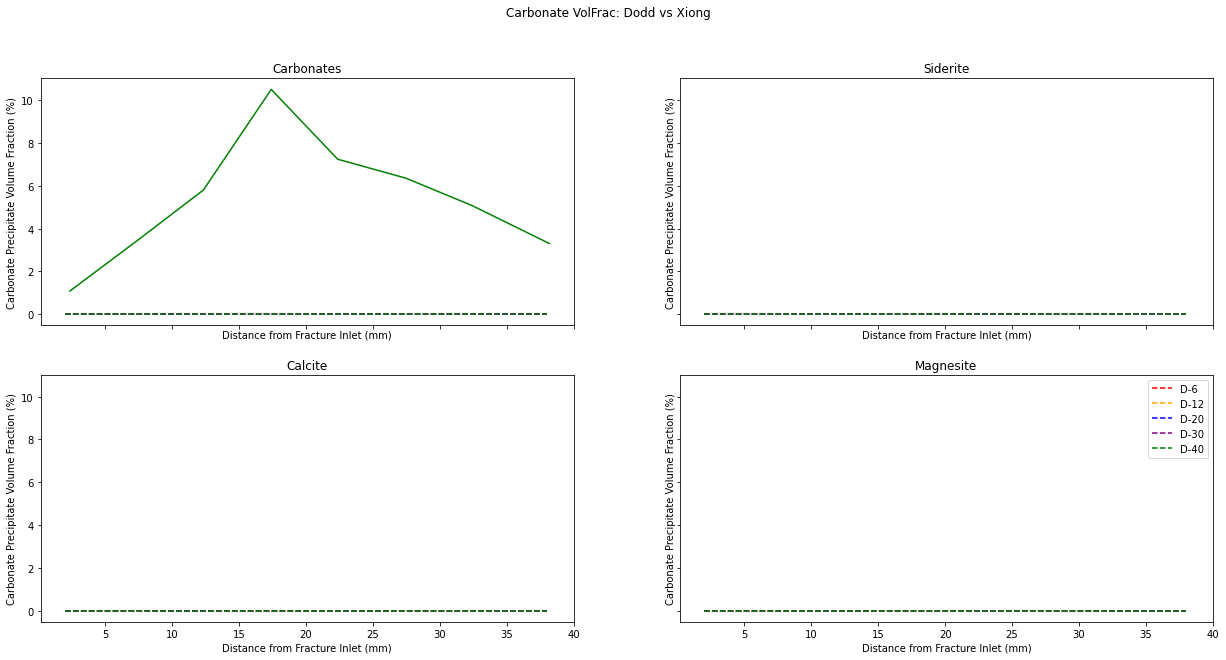

In [654]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, sharex=True, sharey=True)
fig.set_figheight(10)
fig.set_figwidth(21)

fig.suptitle("Carbonate VolFrac: Dodd vs Xiong")

ax1.set_title("Carbonates")
# ax1.scatter(x=x_xiong_fb_dist_mm_NpArr, y=y_xiong_fb_VolFrac_NpArr, c="green", label="X-40")
ax1.plot(x_xiong_fb_dist_mm_NpArr, y_xiong_fb_VolFrac_NpArr, c="green", label="X-40", linestyle="-")
ax1.plot(x_fb_dodd_6week_Carb_DistMm, y_fb_dodd_6week_Carb_VolFracPct, c="red", label="D-6", linestyle="--")
ax1.plot(x_fb_dodd_12week_Carb_DistMm, y_fb_dodd_12week_Carb_VolFracPct, c="orange", label="D-12", linestyle="--")
ax1.plot(x_fb_dodd_20week_Carb_DistMm, y_fb_dodd_20week_Carb_VolFracPct, c="blue", label="D-20", linestyle="--")
ax1.plot(x_fb_dodd_30week_Carb_DistMm, y_fb_dodd_30week_Carb_VolFracPct, c="purple", label="D-30", linestyle="--")
ax1.plot(x_fb_dodd_40week_Carb_DistMm, y_fb_dodd_40week_Carb_VolFracPct, c="green", label="D-40", linestyle="--")
ax1.set_xlabel("Distance from Fracture Inlet (mm)")
ax1.set_ylabel("Carbonate Precipitate Volume Fraction (%)")

ax2.set_title("Siderite")
ax2.plot(x_fb_dodd_6week_Sid_DistMm, y_fb_dodd_6week_Sid_VolFracPct, c="red", label="D-6", linestyle="--")
ax2.plot(x_fb_dodd_12week_Sid_DistMm, y_fb_dodd_12week_Sid_VolFracPct, c="orange", label="D-12", linestyle="--")
ax2.plot(x_fb_dodd_20week_Sid_DistMm, y_fb_dodd_20week_Sid_VolFracPct, c="blue", label="D-20", linestyle="--")
ax2.plot(x_fb_dodd_30week_Sid_DistMm, y_fb_dodd_30week_Sid_VolFracPct, c="purple", label="D-30", linestyle="--")
ax2.plot(x_fb_dodd_40week_Sid_DistMm, y_fb_dodd_40week_Sid_VolFracPct, c="green", label="D-40", linestyle="--")
ax2.set_xlabel("Distance from Fracture Inlet (mm)")
ax2.set_ylabel("Carbonate Precipitate Volume Fraction (%)")

ax3.set_title("Calcite")
ax3.plot(x_fb_dodd_6week_Cal_DistMm, y_fb_dodd_6week_Cal_VolFracPct, c="red", label="D-6", linestyle="--")
ax3.plot(x_fb_dodd_12week_Cal_DistMm, y_fb_dodd_12week_Cal_VolFracPct, c="orange", label="D-12", linestyle="--")
ax3.plot(x_fb_dodd_20week_Cal_DistMm, y_fb_dodd_20week_Cal_VolFracPct, c="blue", label="D-20", linestyle="--")
ax3.plot(x_fb_dodd_30week_Cal_DistMm, y_fb_dodd_30week_Cal_VolFracPct, c="purple", label="D-30", linestyle="--")
ax3.plot(x_fb_dodd_40week_Cal_DistMm, y_fb_dodd_40week_Cal_VolFracPct, c="green", label="D-40", linestyle="--")
ax3.set_xlabel("Distance from Fracture Inlet (mm)")
ax3.set_ylabel("Carbonate Precipitate Volume Fraction (%)")

ax4.set_title("Magnesite")
ax4.plot(x_fb_dodd_6week_Mag_DistMm, y_fb_dodd_6week_Mag_VolFracPct, c="red", label="D-6", linestyle="--")
ax4.plot(x_fb_dodd_12week_Mag_DistMm, y_fb_dodd_12week_Mag_VolFracPct, c="orange", label="D-12", linestyle="--")
ax4.plot(x_fb_dodd_20week_Mag_DistMm, y_fb_dodd_20week_Mag_VolFracPct, c="blue", label="D-20", linestyle="--")
ax4.plot(x_fb_dodd_30week_Mag_DistMm, y_fb_dodd_30week_Mag_VolFracPct, c="purple", label="D-30", linestyle="--")
ax4.plot(x_fb_dodd_40week_Mag_DistMm, y_fb_dodd_40week_Mag_VolFracPct, c="green", label="D-40", linestyle="--")
ax4.set_xlabel("Distance from Fracture Inlet (mm)")
ax4.set_ylabel("Carbonate Precipitate Volume Fraction (%)")

plt.legend()

# Pyroxene Overview

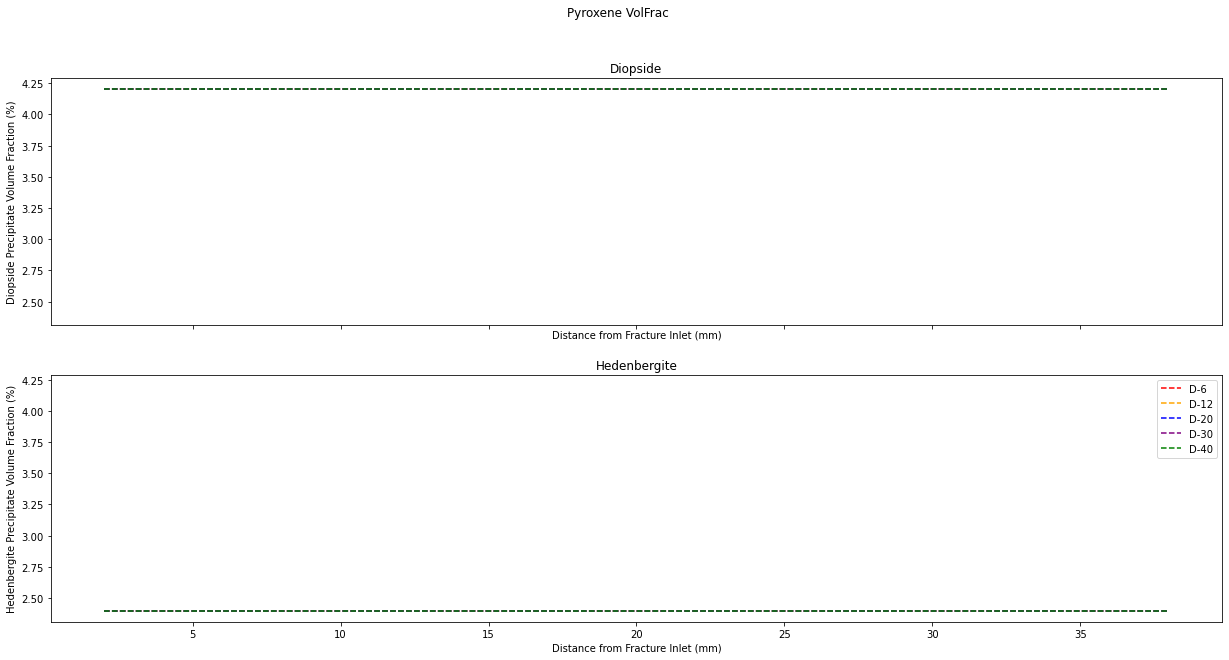

In [655]:
fig, ((ax1, ax2)) = plt.subplots(2, sharex=True, sharey=True)
fig.set_figheight(10)
fig.set_figwidth(21)

fig.suptitle("Pyroxene VolFrac")

ax1.set_title("Diopside")
ax1.plot(x_fb_dodd_6week_Dio_DistMm, y_fb_dodd_6week_Dio_VolFracPct, c="red", label="D-6", linestyle="--")
ax1.plot(x_fb_dodd_12week_Dio_DistMm, y_fb_dodd_12week_Dio_VolFracPct, c="orange", label="D-12", linestyle="--")
ax1.plot(x_fb_dodd_20week_Dio_DistMm, y_fb_dodd_20week_Dio_VolFracPct, c="blue", label="D-20", linestyle="--")
ax1.plot(x_fb_dodd_30week_Dio_DistMm, y_fb_dodd_30week_Dio_VolFracPct, c="purple", label="D-30", linestyle="--")
ax1.plot(x_fb_dodd_40week_Dio_DistMm, y_fb_dodd_40week_Dio_VolFracPct, c="green", label="D-40", linestyle="--")
ax1.set_xlabel("Distance from Fracture Inlet (mm)")
ax1.set_ylabel("Diopside Precipitate Volume Fraction (%)")

ax2.set_title("Hedenbergite")
ax2.plot(x_fb_dodd_6week_Hed_DistMm, y_fb_dodd_6week_Hed_VolFracPct, c="red", label="D-6", linestyle="--")
ax2.plot(x_fb_dodd_12week_Hed_DistMm, y_fb_dodd_12week_Hed_VolFracPct, c="orange", label="D-12", linestyle="--")
ax2.plot(x_fb_dodd_20week_Hed_DistMm, y_fb_dodd_20week_Hed_VolFracPct, c="blue", label="D-20", linestyle="--")
ax2.plot(x_fb_dodd_30week_Hed_DistMm, y_fb_dodd_30week_Hed_VolFracPct, c="purple", label="D-30", linestyle="--")
ax2.plot(x_fb_dodd_40week_Hed_DistMm, y_fb_dodd_40week_Hed_VolFracPct, c="green", label="D-40", linestyle="--")
ax2.set_xlabel("Distance from Fracture Inlet (mm)")
ax2.set_ylabel("Hedenbergite Precipitate Volume Fraction (%)")

plt.legend()

# Plagioclase Overview

Text(0, 0.5, 'Microcline Precipitate Volume Fraction (%)')

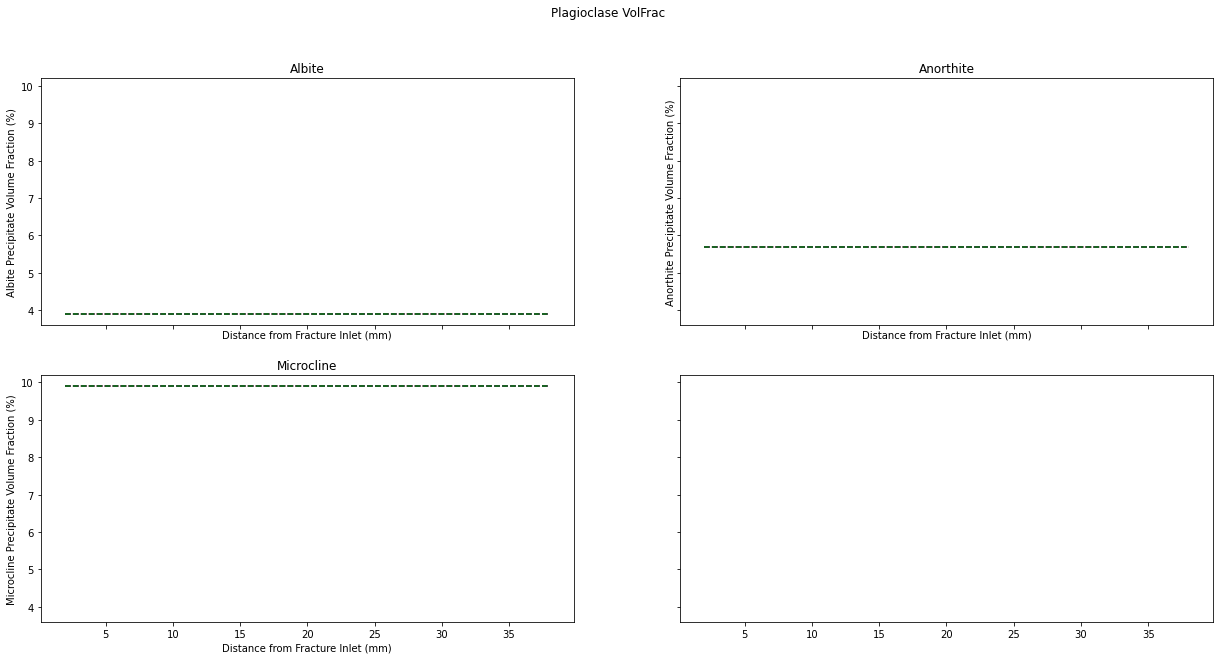

In [656]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, sharex=True, sharey=True)
fig.set_figheight(10)
fig.set_figwidth(21)

fig.suptitle("Plagioclase VolFrac")

ax1.set_title("Albite")
ax1.plot(x_fb_dodd_6week_Alb_DistMm, y_fb_dodd_6week_Alb_VolFracPct, c="red", label="D-6", linestyle="--")
ax1.plot(x_fb_dodd_12week_Alb_DistMm, y_fb_dodd_12week_Alb_VolFracPct, c="orange", label="D-12", linestyle="--")
ax1.plot(x_fb_dodd_20week_Alb_DistMm, y_fb_dodd_20week_Alb_VolFracPct, c="blue", label="D-20", linestyle="--")
ax1.plot(x_fb_dodd_30week_Alb_DistMm, y_fb_dodd_30week_Alb_VolFracPct, c="purple", label="D-30", linestyle="--")
ax1.plot(x_fb_dodd_40week_Alb_DistMm, y_fb_dodd_40week_Alb_VolFracPct, c="green", label="D-40", linestyle="--")
ax1.set_xlabel("Distance from Fracture Inlet (mm)")
ax1.set_ylabel("Albite Precipitate Volume Fraction (%)")

ax2.set_title("Anorthite")
ax2.plot(x_fb_dodd_6week_Ano_DistMm, y_fb_dodd_6week_Ano_VolFracPct, c="red", label="D-6", linestyle="--")
ax2.plot(x_fb_dodd_12week_Ano_DistMm, y_fb_dodd_12week_Ano_VolFracPct, c="orange", label="D-12", linestyle="--")
ax2.plot(x_fb_dodd_20week_Ano_DistMm, y_fb_dodd_20week_Ano_VolFracPct, c="blue", label="D-20", linestyle="--")
ax2.plot(x_fb_dodd_30week_Ano_DistMm, y_fb_dodd_30week_Ano_VolFracPct, c="purple", label="D-30", linestyle="--")
ax2.plot(x_fb_dodd_40week_Ano_DistMm, y_fb_dodd_40week_Ano_VolFracPct, c="green", label="D-40", linestyle="--")
ax2.set_xlabel("Distance from Fracture Inlet (mm)")
ax2.set_ylabel("Anorthite Precipitate Volume Fraction (%)")

ax3.set_title("Microcline")
ax3.plot(x_fb_dodd_6week_Mic_DistMm, y_fb_dodd_6week_Mic_VolFracPct, c="red", label="D-6", linestyle="--")
ax3.plot(x_fb_dodd_12week_Mic_DistMm, y_fb_dodd_12week_Mic_VolFracPct, c="orange", label="D-12", linestyle="--")
ax3.plot(x_fb_dodd_20week_Mic_DistMm, y_fb_dodd_20week_Mic_VolFracPct, c="blue", label="D-20", linestyle="--")
ax3.plot(x_fb_dodd_30week_Mic_DistMm, y_fb_dodd_30week_Mic_VolFracPct, c="purple", label="D-30", linestyle="--")
ax3.plot(x_fb_dodd_40week_Mic_DistMm, y_fb_dodd_40week_Mic_VolFracPct, c="green", label="D-40", linestyle="--")
ax3.set_xlabel("Distance from Fracture Inlet (mm)")
ax3.set_ylabel("Microcline Precipitate Volume Fraction (%)")

# Olivine Overview

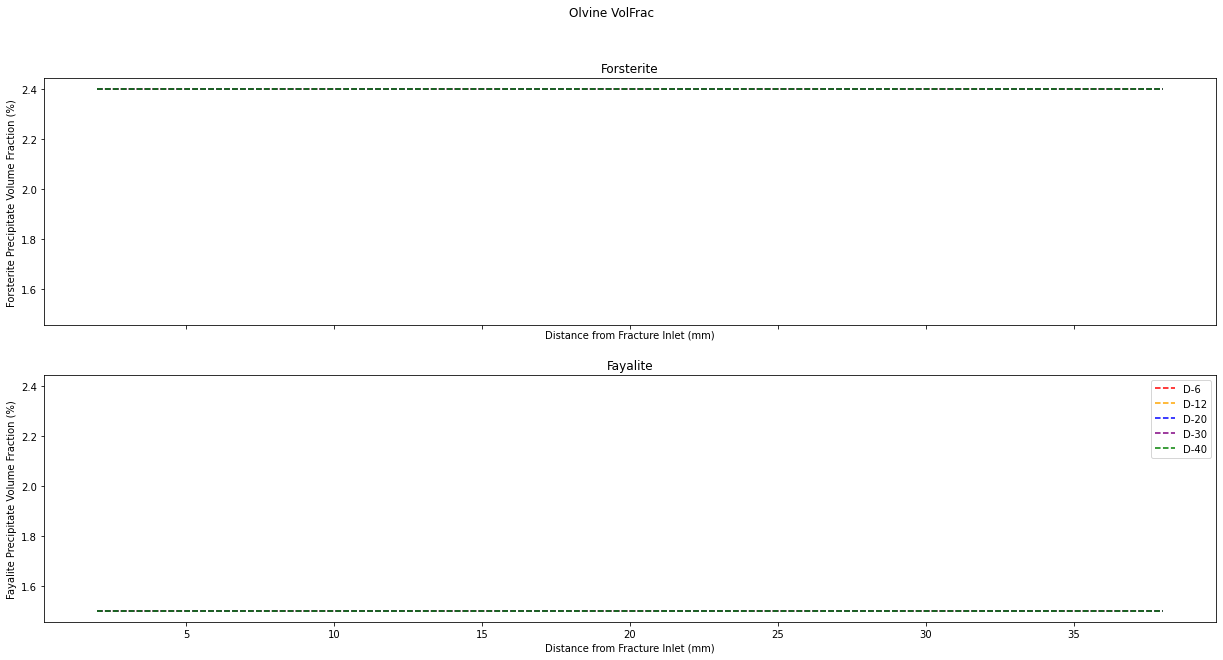

In [657]:
fig, ((ax1, ax2)) = plt.subplots(2, sharex=True, sharey=True)
fig.set_figheight(10)
fig.set_figwidth(21)

fig.suptitle("Olvine VolFrac")

ax1.set_title("Forsterite")
ax1.plot(x_fb_dodd_6week_For_DistMm, y_fb_dodd_6week_For_VolFracPct, c="red", label="D-6", linestyle="--")
ax1.plot(x_fb_dodd_12week_For_DistMm, y_fb_dodd_12week_For_VolFracPct, c="orange", label="D-12", linestyle="--")
ax1.plot(x_fb_dodd_20week_For_DistMm, y_fb_dodd_20week_For_VolFracPct, c="blue", label="D-20", linestyle="--")
ax1.plot(x_fb_dodd_30week_For_DistMm, y_fb_dodd_30week_For_VolFracPct, c="purple", label="D-30", linestyle="--")
ax1.plot(x_fb_dodd_40week_For_DistMm, y_fb_dodd_40week_For_VolFracPct, c="green", label="D-40", linestyle="--")
ax1.set_xlabel("Distance from Fracture Inlet (mm)")
ax1.set_ylabel("Forsterite Precipitate Volume Fraction (%)")

ax2.set_title("Fayalite")
ax2.plot(x_fb_dodd_6week_Fay_DistMm, y_fb_dodd_6week_Fay_VolFracPct, c="red", label="D-6", linestyle="--")
ax2.plot(x_fb_dodd_12week_Fay_DistMm, y_fb_dodd_12week_Fay_VolFracPct, c="orange", label="D-12", linestyle="--")
ax2.plot(x_fb_dodd_20week_Fay_DistMm, y_fb_dodd_20week_Fay_VolFracPct, c="blue", label="D-20", linestyle="--")
ax2.plot(x_fb_dodd_30week_Fay_DistMm, y_fb_dodd_30week_Fay_VolFracPct, c="purple", label="D-30", linestyle="--")
ax2.plot(x_fb_dodd_40week_Fay_DistMm, y_fb_dodd_40week_Fay_VolFracPct, c="green", label="D-40", linestyle="--")
ax2.set_xlabel("Distance from Fracture Inlet (mm)")
ax2.set_ylabel("Fayalite Precipitate Volume Fraction (%)")

plt.legend()

# Serpentinite Overview

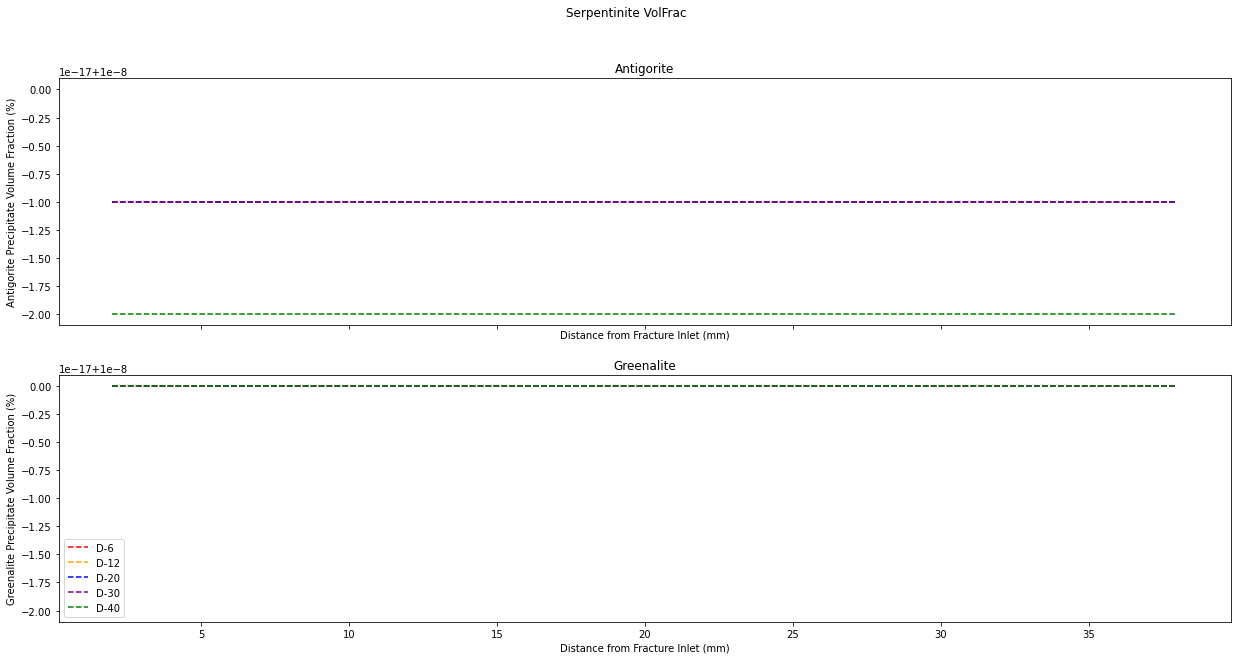

In [658]:
fig, ((ax1, ax2)) = plt.subplots(2, sharex=True, sharey=True)
fig.set_figheight(10)
fig.set_figwidth(21)

fig.suptitle("Serpentinite VolFrac")

ax1.set_title("Antigorite")
ax1.plot(x_fb_dodd_6week_Ant_DistMm, y_fb_dodd_6week_Ant_VolFracPct, c="red", label="D-6", linestyle="--")
ax1.plot(x_fb_dodd_12week_Ant_DistMm, y_fb_dodd_12week_Ant_VolFracPct, c="orange", label="D-12", linestyle="--")
ax1.plot(x_fb_dodd_20week_Ant_DistMm, y_fb_dodd_20week_Ant_VolFracPct, c="blue", label="D-20", linestyle="--")
ax1.plot(x_fb_dodd_30week_Ant_DistMm, y_fb_dodd_30week_Ant_VolFracPct, c="purple", label="D-30", linestyle="--")
ax1.plot(x_fb_dodd_40week_Ant_DistMm, y_fb_dodd_40week_Ant_VolFracPct, c="green", label="D-40", linestyle="--")
ax1.set_xlabel("Distance from Fracture Inlet (mm)")
ax1.set_ylabel("Antigorite Precipitate Volume Fraction (%)")

ax2.set_title("Greenalite")
ax2.plot(x_fb_dodd_6week_Gre_DistMm, y_fb_dodd_6week_Gre_VolFracPct, c="red", label="D-6", linestyle="--")
ax2.plot(x_fb_dodd_12week_Gre_DistMm, y_fb_dodd_12week_Gre_VolFracPct, c="orange", label="D-12", linestyle="--")
ax2.plot(x_fb_dodd_20week_Gre_DistMm, y_fb_dodd_20week_Gre_VolFracPct, c="blue", label="D-20", linestyle="--")
ax2.plot(x_fb_dodd_30week_Gre_DistMm, y_fb_dodd_30week_Gre_VolFracPct, c="purple", label="D-30", linestyle="--")
ax2.plot(x_fb_dodd_40week_Gre_DistMm, y_fb_dodd_40week_Gre_VolFracPct, c="green", label="D-40", linestyle="--")
ax2.set_xlabel("Distance from Fracture Inlet (mm)")
ax2.set_ylabel("Greenalite Precipitate Volume Fraction (%)")

plt.legend()

Text(0, 0.5, 'Magnetite Precipitate Volume Fraction (%)')

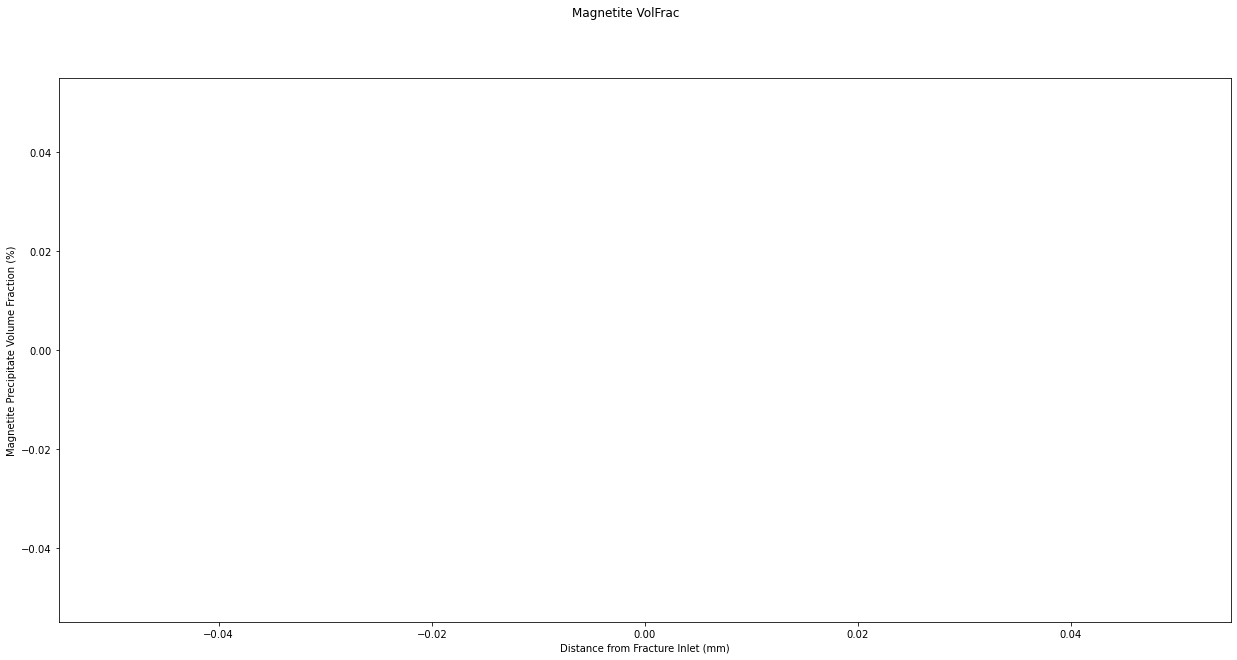

In [659]:
# Rate         7.0 --> 7.5 --> 7.9 --> 8.0 --> 8.1 --> 8.5 --> 9.0 -->10.0
# SSA                 25
# Magnetite 0.0016 --> 0.008 --> 0.0008 --> 0.01 --> 0.005 --> 0.0008 --> 0.0012 -->0.0006
fig, (ax1) = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(21)

fig.suptitle("Magnetite VolFrac")

ax1.plot(x_fb_dodd_6week_Magnetite_DistMm, y_fb_dodd_6week_Magnetite_VolFracPct, c="red", label="D-6", linestyle="--")
ax1.plot(x_fb_dodd_12week_Magnetite_DistMm, y_fb_dodd_12week_Magnetite_VolFracPct, c="orange", label="D-12", linestyle="--")
ax1.plot(x_fb_dodd_20week_Magnetite_DistMm, y_fb_dodd_20week_Magnetite_VolFracPct, c="blue", label="D-20", linestyle="--")
ax1.plot(x_fb_dodd_30week_Magnetite_DistMm, y_fb_dodd_30week_Magnetite_VolFracPct, c="purple", label="D-30", linestyle="--")
ax1.plot(x_fb_dodd_40week_Magnetite_DistMm, y_fb_dodd_40week_Magnetite_VolFracPct, c="green", label="D-40", linestyle="--")
ax1.set_xlabel("Distance from Fracture Inlet (mm)")
ax1.set_ylabel("Magnetite Precipitate Volume Fraction (%)")

# Calibration Work

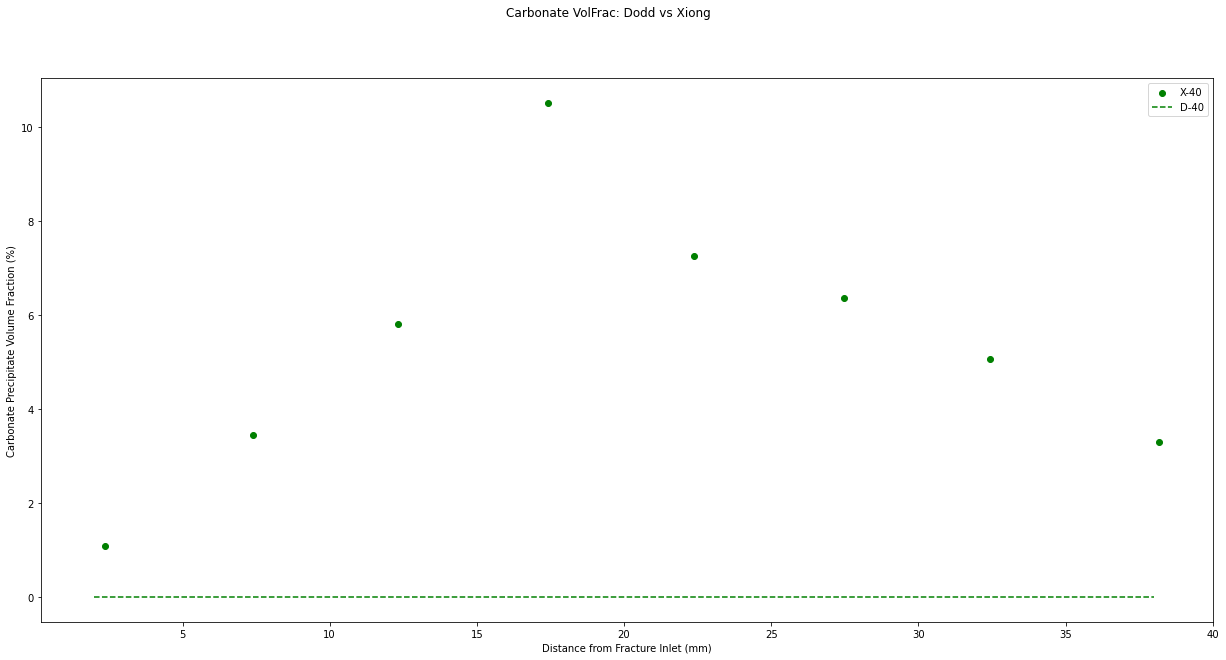

In [660]:
# Base Xiong SSAs
# Siderite SSA = 0.000033
fig, ax1 = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(21)
fig.suptitle("Carbonate VolFrac: Dodd vs Xiong")
ax1.scatter(x=x_xiong_fb_dist_mm_NpArr, y=y_xiong_fb_VolFrac_NpArr, c="green", label="X-40")
# ax1.plot(x_fb_dodd_6week_Carb_DistMm, y_fb_dodd_6week_Carb_VolFracPct, c="red", label="D-6", linestyle="--")
# ax1.plot(x_fb_dodd_12week_Carb_DistMm, y_fb_dodd_12week_Carb_VolFracPct, c="orange", label="D-12", linestyle="--")
# ax1.plot(x_fb_dodd_20week_Carb_DistMm, y_fb_dodd_20week_Carb_VolFracPct, c="blue", label="D-20", linestyle="--")
# ax1.plot(x_fb_dodd_30week_Carb_DistMm, y_fb_dodd_30week_Carb_VolFracPct, c="purple", label="D-30", linestyle="--")
ax1.plot(x_fb_dodd_40week_Carb_DistMm, y_fb_dodd_40week_Carb_VolFracPct, c="green", label="D-40", linestyle="--")
ax1.set_xlabel("Distance from Fracture Inlet (mm)")
ax1.set_ylabel("Carbonate Precipitate Volume Fraction (%)")
plt.legend()